1. Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

2. Normalize data

In [3]:
cryptos = ['ADA', 'BTC', 'ETH']

for crypto in cryptos:
    data = pd.read_csv(f'../data/raw/{crypto}.csv')
    data = data[['Date', 'Close']]
    data['Date'] = pd.to_datetime(data['Date'])
    
    if data['Close'].dtype == object:  # Kiểm tra xem cột Close có phải là chuỗi không
        data['Close'] = data['Close'].str.replace(',', '').astype(float)
    
    data.sort_values(by='Date', inplace=True)
    data.to_csv(f'../data/processed/{crypto}_processed.csv', index=False)

3. Visualize data

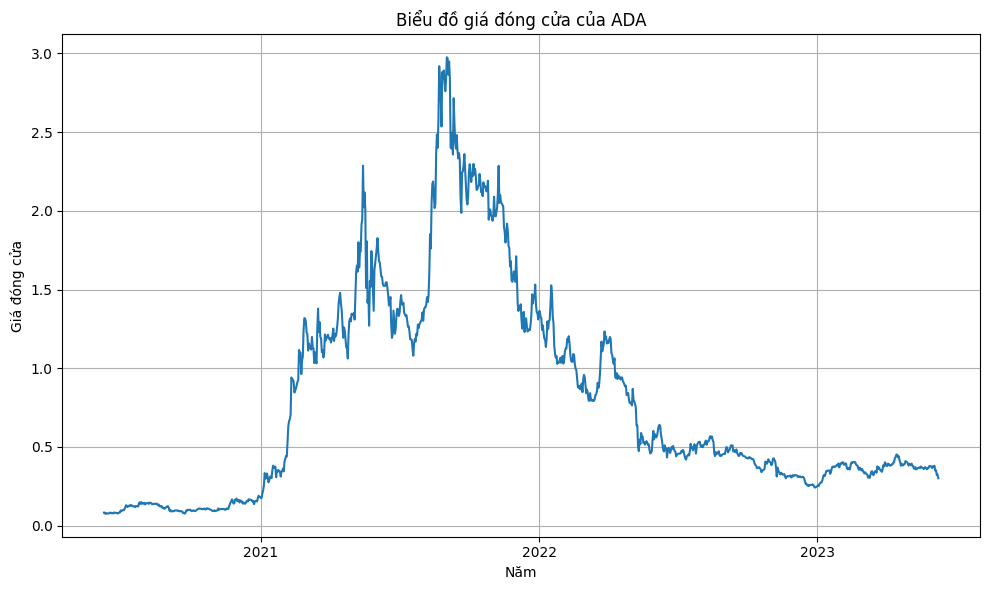

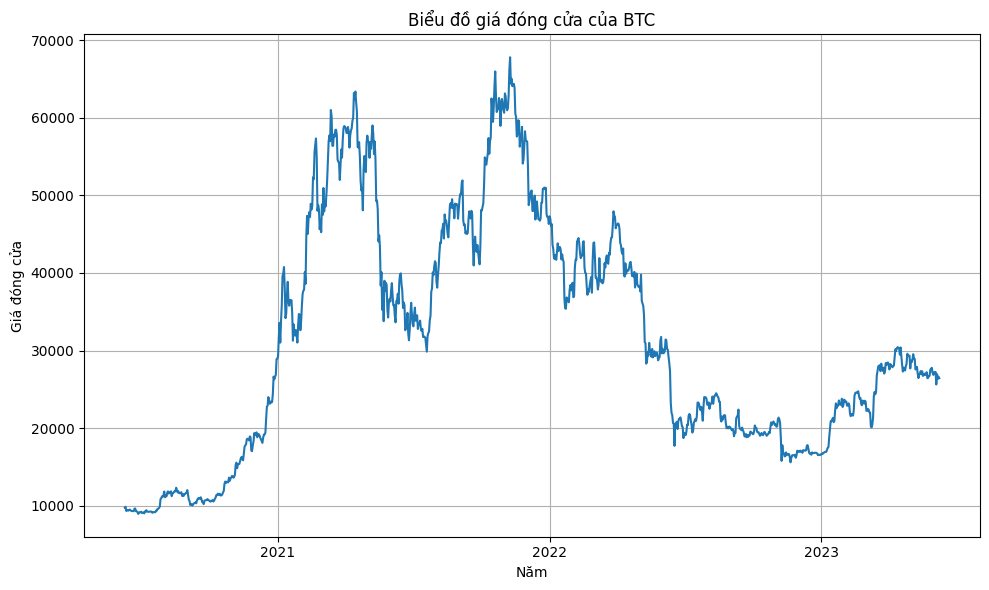

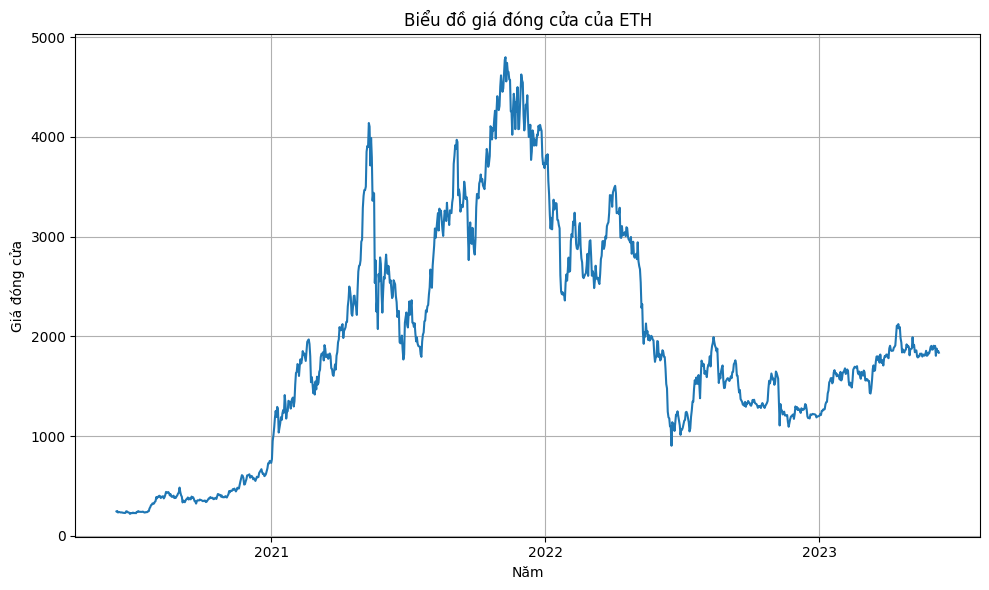

In [4]:
for crypto in cryptos:
    data = pd.read_csv(f'../data/processed/{crypto}_processed.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(f'Biểu đồ giá đóng cửa của {crypto}')
    plt.xlabel('Năm')
    plt.ylabel('Giá đóng cửa')

    # Định dạng lại ngày tháng năm trên trục x
    date_format = mdates.DateFormatter('%Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.grid(True)
    plt.tight_layout()

    plt.show()